# Image Embedding with MediaPipe Tasks

This notebook will show you how to use the MediaPipe Tasks Python API to compare two separate image files to determine how similar they are. These values will range from -1 to 1 with 1 being the same image This is done through a technique called cosine similarity.

## Preparation
You can start by installing the necessary dependencies for your project.


The next step you will take is to download the off-the-shelf model that will be used for image embedding. In this case you will use mobilenet, but you may use any other appropriate model or a model that you have built for your own specific use-cases with MediaPipe Tasks.

In [26]:
# !powershell -Command Invoke-WebRequest -Uri https://storage.googleapis.com/mediapipe-models/image_embedder/mobilenet_v3_small/float32/1/mobilenet_v3_small.tflite -OutFile models/mobilenet_v3_small.tflite

For the final preparation step, you will need to have two separate images that can be compared. You can download two provided images through the following code, or you can download your own from a different location.

In [27]:
import os

# Load all images in demo_data folder
IMAGE_FILENAMES = [
    f for f in os.listdir("demo_data") if f.endswith(".jpg") or f.endswith(".png")
]
IMAGE_FILENAMES

['berlin_1266630_1.jpg',
 'berlin_1266630_2.jpg',
 'berlin_13507504_1.jpg',
 'berlin_13507504_2.jpg',
 'berlin_13508386_1.jpg',
 'berlin_13508386_2.jpg',
 'berlin_14807332_1.jpg',
 'berlin_14807332_2.jpg',
 'berlin_1583556_1.jpg',
 'berlin_1583556_2.jpg',
 'berlin_16627548_1.jpg',
 'berlin_16627548_2.jpg',
 'berlin_17339881_1.jpg',
 'berlin_17339881_2.jpg',
 'berlin_18646765_1.jpg',
 'berlin_18646765_2.jpg',
 'berlin_20071024_1.jpg',
 'berlin_20071024_2.jpg',
 'berlin_21282152_1.jpg',
 'berlin_21282152_2.jpg',
 'berlin_21884206_1.jpg',
 'berlin_21884206_2.jpg',
 'berlin_221015_1.jpg',
 'berlin_221015_2.jpg',
 'berlin_23091571_1.jpg',
 'berlin_23091571_2.jpg',
 'berlin_2740721_1.jpg',
 'berlin_2740721_2.jpg',
 'berlin_2740721_3.jpg',
 'berlin_274072_1.jpg',
 'berlin_274072_2.jpg',
 'berlin_28932679_1.jpg',
 'berlin_28932679_2.jpg',
 'berlin_31170463_1.jpg',
 'berlin_31170463_2.jpg',
 'berlin_3224631_1.jpg',
 'berlin_3224631_2.jpg',
 'berlin_3224631_3.jpg',
 'berlin_322463_1.jpg',
 'berl

# Performing Image Embedding
Now that you have retrieved the two images that will be compared, you can display them to confirm that they look correct. For this example you should see two separate, but similar, pictures of burgers.

berlin_1266630_1.jpg


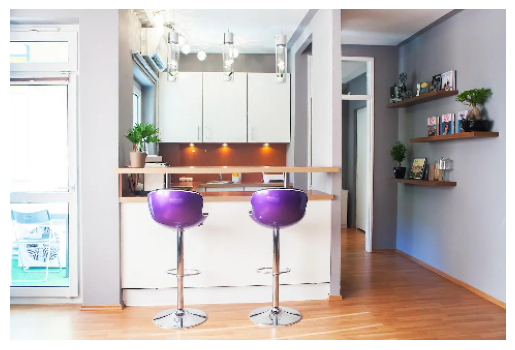

<Figure size 100x100 with 0 Axes>

berlin_1266630_2.jpg


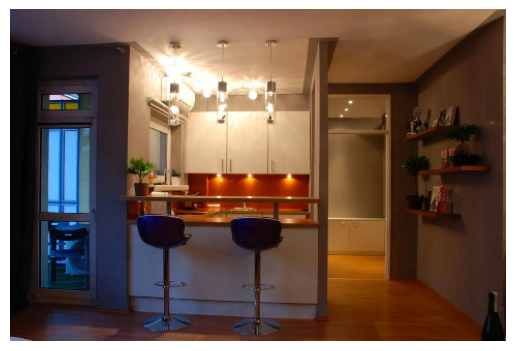

<Figure size 100x100 with 0 Axes>

berlin_13507504_1.jpg


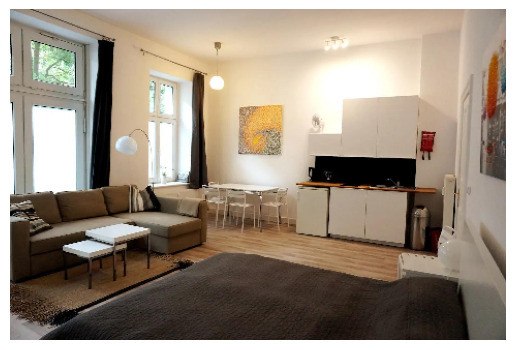

<Figure size 100x100 with 0 Axes>

berlin_13507504_2.jpg


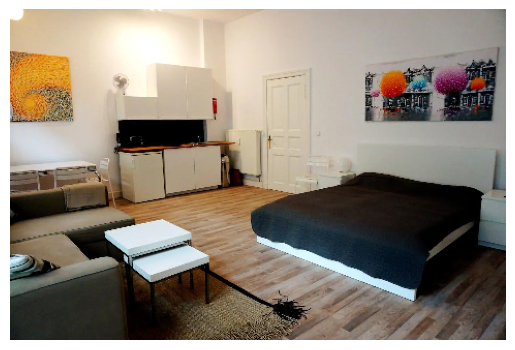

<Figure size 100x100 with 0 Axes>

In [28]:
from matplotlib import pyplot as plt
import cv2
import math

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480


def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h / (w / DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w / (h / DESIRED_HEIGHT)), DESIRED_HEIGHT))

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis("off")
    plt.figure(figsize=(1, 1))
    plt.show()


# Preview some images
images = {name: cv2.imread(f"demo_data/{name}") for name in IMAGE_FILENAMES}
for i, (name, image) in enumerate(images.items()):
    if i > 3:
        break

    print(name)
    resize_and_show(image)

Once everything looks good, you can start performing inference. You will start by creating the options that are necessary for associating your model with the Image Embedder, as well as some customizations.

Next you will create the Image Embedder, then format your two images for MediaPipe so that you can use cosine similarity to compare them.

Finally, you will display the similarity value.

In [29]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# Create options for Image Embedder
model_file = "models/mobilenet_v3_small.tflite"
base_options = python.BaseOptions(model_asset_path=model_file)
l2_normalize = True  # @param {type:"boolean"}
quantize = True  # @param {type:"boolean"}
options = vision.ImageEmbedderOptions(
    base_options=base_options, l2_normalize=l2_normalize, quantize=quantize
)


# Create Image Embedder
with vision.ImageEmbedder.create_from_options(options) as embedder:
    # Format images for MediaPipe
    mp_images = [
        {"file_name": name, "mp_image": mp.Image.create_from_file(f"demo_data/{name}")}
        for name in IMAGE_FILENAMES
    ]

    # Embed images
    embedding_results = [
        {
            "file_name": mp_image["file_name"],
            "embeddings": embedder.embed(mp_image["mp_image"]),
        }
        for mp_image in mp_images
    ]

    # Print embeddings
    for result in embedding_results:
        print(f"File name: {result['file_name']}")
        print(f"Embeddings: {result['embeddings']}")


File name: berlin_1266630_1.jpg
Embeddings: EmbeddingResult(embeddings=[Embedding(embedding=array([  0, 253,   0, ..., 253, 253,   4], dtype=uint8), head_index=0, head_name='feature')], timestamp_ms=None)
File name: berlin_1266630_2.jpg
Embeddings: EmbeddingResult(embeddings=[Embedding(embedding=array([254, 253,  12, ..., 253,   8, 254], dtype=uint8), head_index=0, head_name='feature')], timestamp_ms=None)
File name: berlin_13507504_1.jpg
Embeddings: EmbeddingResult(embeddings=[Embedding(embedding=array([254, 255,  18, ..., 254, 254,   1], dtype=uint8), head_index=0, head_name='feature')], timestamp_ms=None)
File name: berlin_13507504_2.jpg
Embeddings: EmbeddingResult(embeddings=[Embedding(embedding=array([254, 254,   7, ..., 253, 253,   1], dtype=uint8), head_index=0, head_name='feature')], timestamp_ms=None)
File name: berlin_13508386_1.jpg
Embeddings: EmbeddingResult(embeddings=[Embedding(embedding=array([255,   0,   4, ..., 254, 255,   1], dtype=uint8), head_index=0, head_name='fea

In [30]:
# Calculate and print similarity among all images
similarity_matrix = []
for i in range(len(embedding_results)):
    similarity_row = []
    for j in range(len(embedding_results)):
        similarity = vision.ImageEmbedder.cosine_similarity(
            embedding_results[i]["embeddings"].embeddings[0],
            embedding_results[j]["embeddings"].embeddings[0],
        )

        similarity_row.append(
            {
                "file_name_1": embedding_results[i]["file_name"],
                "file_name_2": embedding_results[j]["file_name"],
                "similarity": similarity,
            }
        )

    similarity_matrix.append(similarity_row)

# Print similarity matrix. Row and cols headers will be the file names. Matrix will be just 2 rounded values.
for row in similarity_matrix:
    print(
        [
            f"{row[i]['file_name_1']} vs {row[i]['file_name_2']}: {round(row[i]['similarity'], 2)}"
            for i in range(len(row))
        ]
    )


['berlin_1266630_1.jpg vs berlin_1266630_1.jpg: 1.0', 'berlin_1266630_1.jpg vs berlin_1266630_2.jpg: 0.51', 'berlin_1266630_1.jpg vs berlin_13507504_1.jpg: 0.3', 'berlin_1266630_1.jpg vs berlin_13507504_2.jpg: 0.3', 'berlin_1266630_1.jpg vs berlin_13508386_1.jpg: 0.28', 'berlin_1266630_1.jpg vs berlin_13508386_2.jpg: 0.25', 'berlin_1266630_1.jpg vs berlin_14807332_1.jpg: 0.23', 'berlin_1266630_1.jpg vs berlin_14807332_2.jpg: 0.25', 'berlin_1266630_1.jpg vs berlin_1583556_1.jpg: 0.26', 'berlin_1266630_1.jpg vs berlin_1583556_2.jpg: 0.21', 'berlin_1266630_1.jpg vs berlin_16627548_1.jpg: 0.19', 'berlin_1266630_1.jpg vs berlin_16627548_2.jpg: 0.25', 'berlin_1266630_1.jpg vs berlin_17339881_1.jpg: 0.23', 'berlin_1266630_1.jpg vs berlin_17339881_2.jpg: 0.23', 'berlin_1266630_1.jpg vs berlin_18646765_1.jpg: 0.13', 'berlin_1266630_1.jpg vs berlin_18646765_2.jpg: 0.26', 'berlin_1266630_1.jpg vs berlin_20071024_1.jpg: 0.33', 'berlin_1266630_1.jpg vs berlin_20071024_2.jpg: 0.41', 'berlin_1266630_

# K-Means Clustering

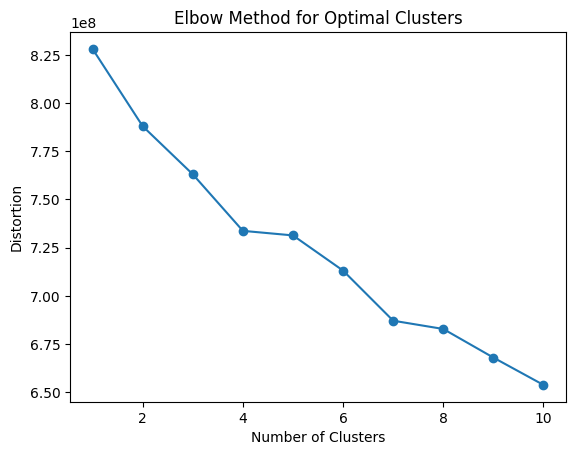

Cluster 0: ['berlin_13507504_1.jpg', 'berlin_13508386_1.jpg', 'berlin_20071024_2.jpg', 'berlin_21282152_1.jpg', 'berlin_21282152_2.jpg', 'berlin_221015_1.jpg', 'berlin_23091571_1.jpg', 'berlin_23091571_2.jpg', 'berlin_274072_1.jpg', 'berlin_274072_2.jpg', 'berlin_31170463_1.jpg', 'berlin_3224631_1.jpg', 'berlin_3224631_2.jpg', 'berlin_3224631_3.jpg', 'berlin_969200_1.jpg', 'berlin_969200_2.jpg', 'berlin_969200_3.jpg']
Cluster 1: ['berlin_1583556_2.jpg', 'berlin_16627548_2.jpg', 'berlin_18646765_1.jpg', 'berlin_221015_2.jpg', 'berlin_28932679_1.jpg', 'berlin_28932679_2.jpg', 'berlin_322463_1.jpg', 'berlin_4750486_2.jpg', 'berlin_47938_2.jpg', 'berlin_68448_2.jpg', 'berlin_68448_3.jpg', 'berlin_8341901_1.jpg', 'berlin_8341901_2.jpg', 'berlin_8603631_1.jpg', 'berlin_8603631_2.jpg', 'berlin_903947_1.jpg']
Cluster 2: ['berlin_1266630_1.jpg', 'berlin_1266630_2.jpg', 'berlin_34556641_1.jpg', 'berlin_34556641_2.jpg', 'berlin_47938_1.jpg', 'berlin_4936023_1.jpg', 'berlin_4936023_2.jpg', 'berlin

In [31]:
import numpy as np

# Prepare data for clustering
embedding_vectors = np.array(
    [result["embeddings"].embeddings[0].embedding for result in embedding_results]
)


# Function to calculate distortions for the Elbow Method
def calculate_distortions(data, max_clusters=None):
    n_samples = len(data)
    if max_clusters is None:
        max_clusters = min(10, n_samples)
    else:
        max_clusters = min(max_clusters, n_samples)

    distortions = []
    for k in range(1, max_clusters + 1):
        _, labels, centers = cv2.kmeans(
            data.astype(np.float32),
            k,
            None,
            (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
            10,
            cv2.KMEANS_RANDOM_CENTERS,
        )
        distortion = sum(
            np.linalg.norm(data[i] - centers[labels[i][0]]) ** 2
            for i in range(len(data))
        )
        distortions.append(distortion)
    return distortions


# Calculate distortions for different cluster counts
distortions = calculate_distortions(embedding_vectors)

# Plot the Elbow Method graph
plt.plot(range(1, len(distortions) + 1), distortions, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Distortion")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Choose the optimal number of clusters (e.g., based on the Elbow Method)
optimal_clusters = int(input("Enter the optimal number of clusters: "))

# Perform K-Means clustering with the optimal number of clusters
_, labels, centers = cv2.kmeans(
    embedding_vectors.astype(np.float32),
    optimal_clusters,
    None,
    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2),
    10,
    cv2.KMEANS_RANDOM_CENTERS,
)

# Group images by clusters
clusters = {i: [] for i in range(optimal_clusters)}
for idx, label in enumerate(labels.flatten()):
    clusters[label].append(embedding_results[idx]["file_name"])

# Print cluster groups
for cluster_id, image_files in clusters.items():
    print(f"Cluster {cluster_id}: {image_files}")

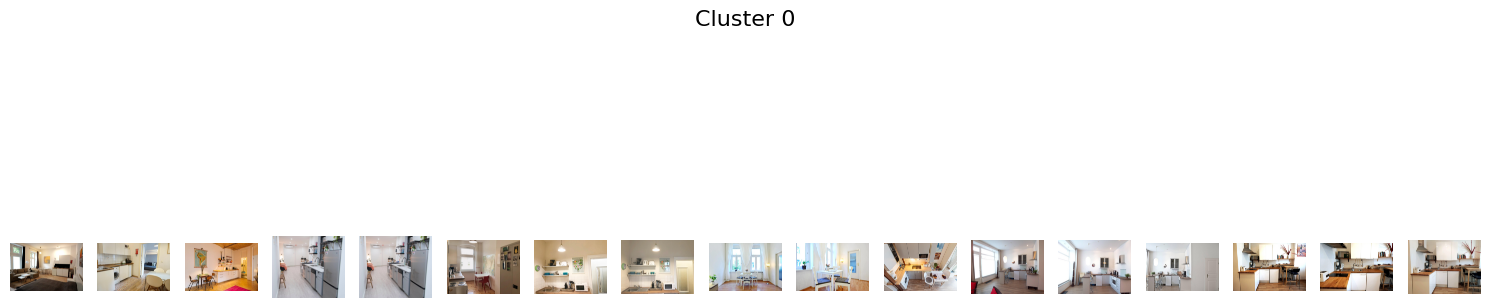

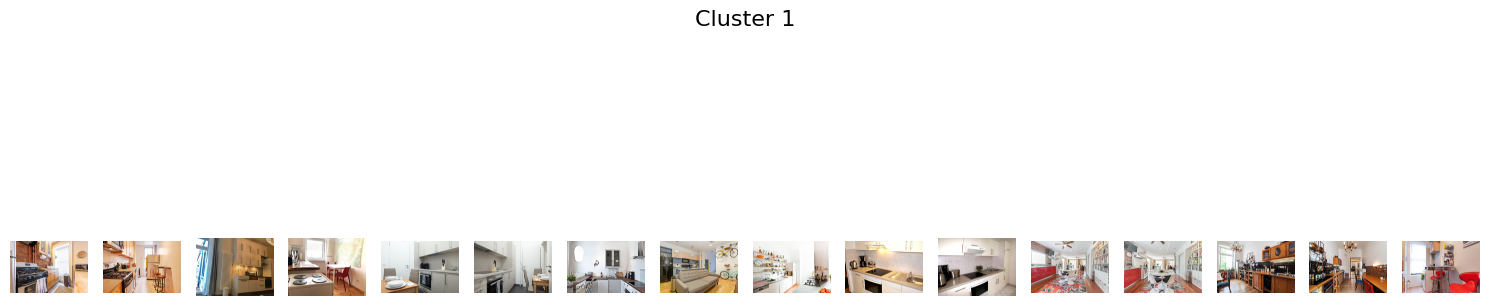

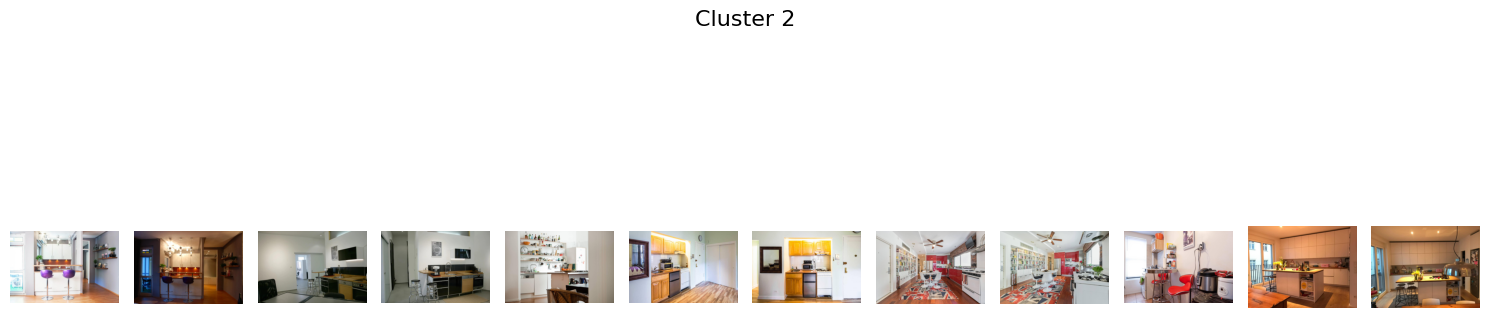

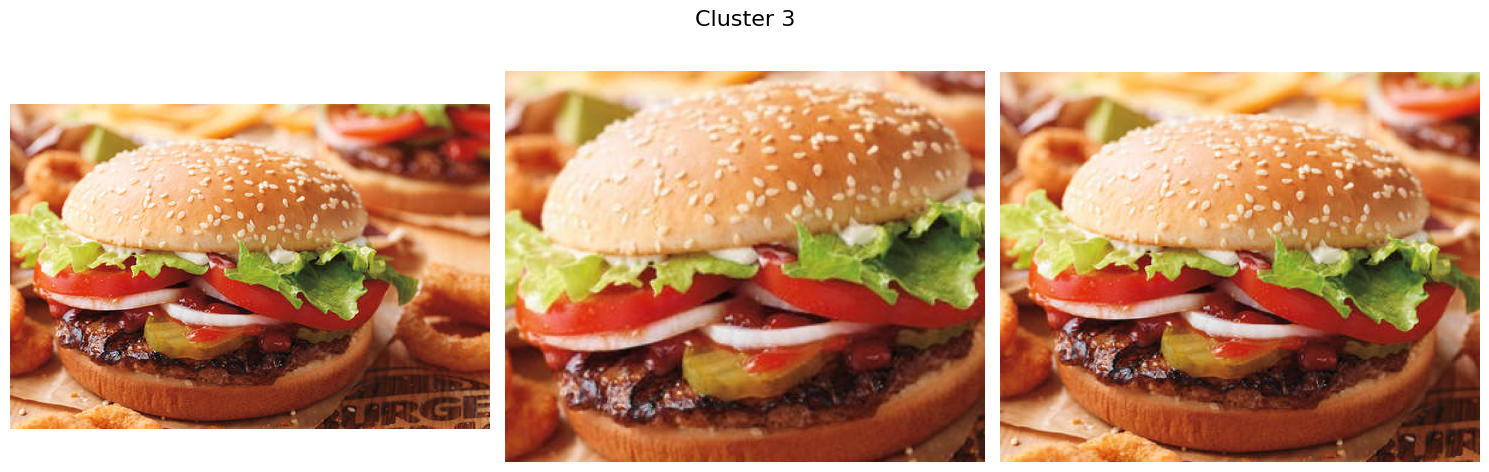

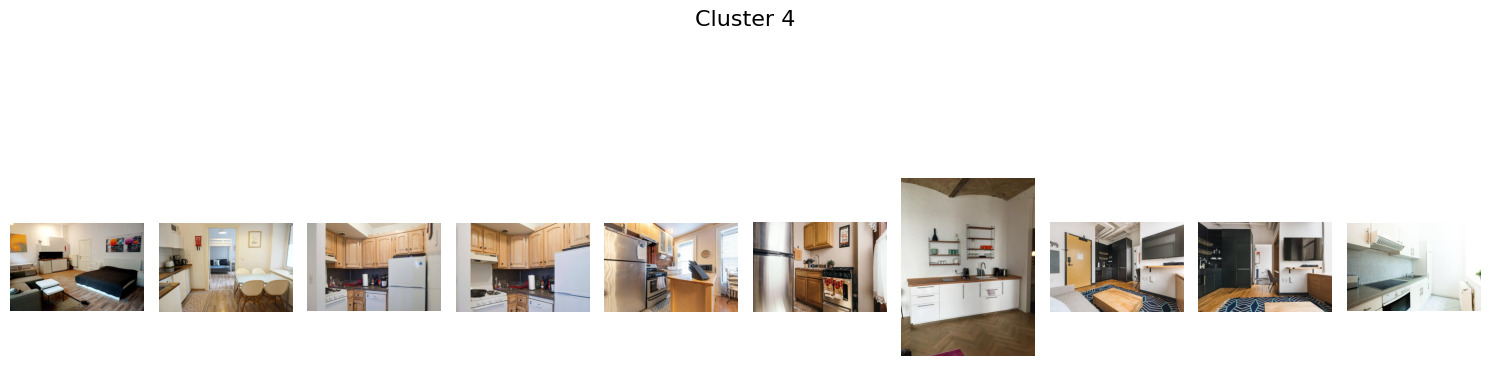

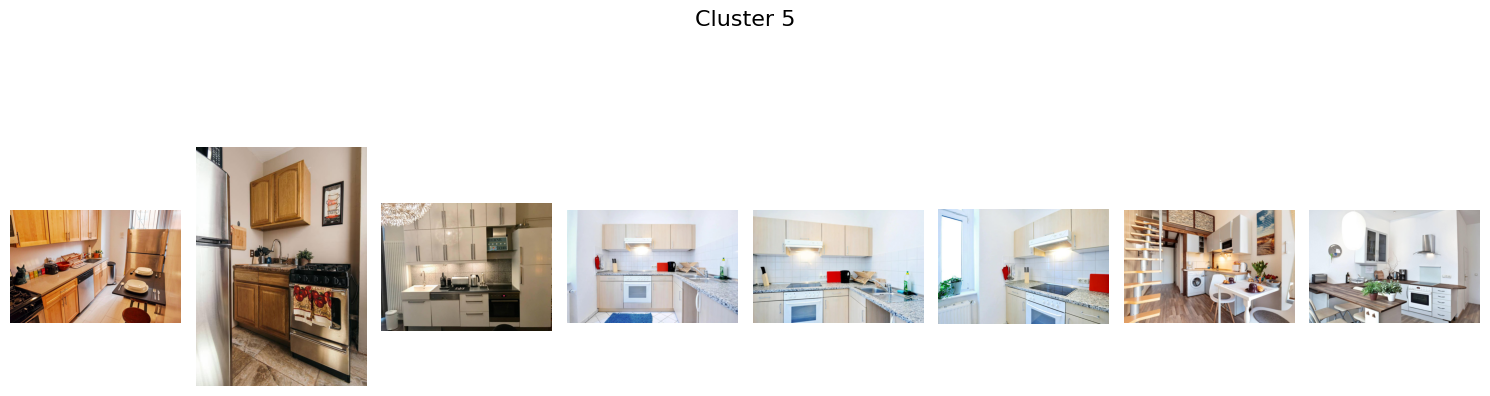

TypeError: 'Axes' object is not iterable

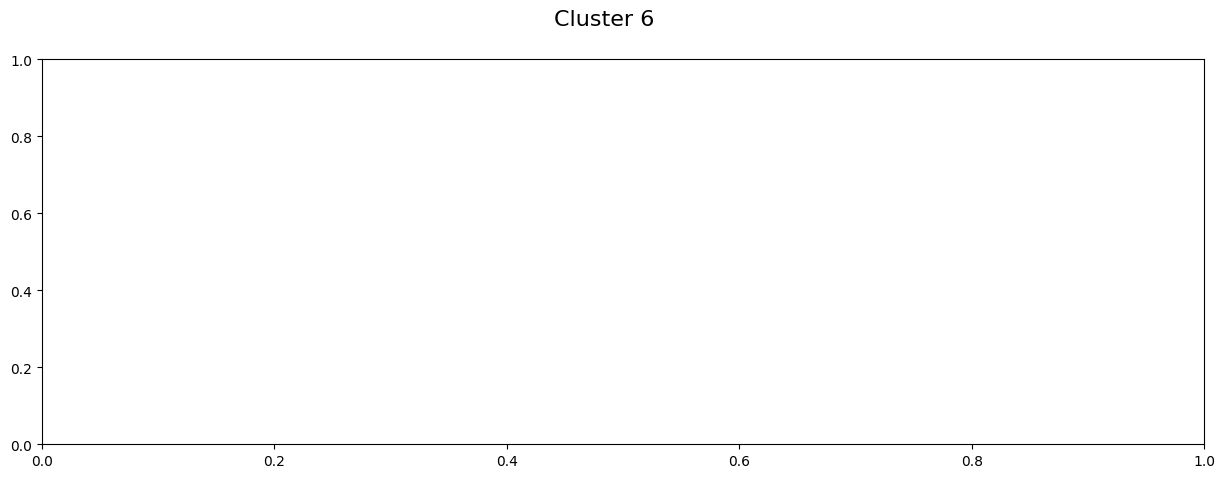

In [35]:
# Display all images per cluster in a grid
for cluster_id, image_files in clusters.items():
    fig, axes = plt.subplots(1, len(image_files), figsize=(15, 5))
    fig.suptitle(f"Cluster {cluster_id}", fontsize=16)
    
    for ax, image_file in zip(axes, image_files):
        ax.imshow(cv2.cvtColor(images[image_file], cv2.COLOR_BGR2RGB))
        ax.axis("off")
    
    plt.tight_layout()
    plt.show()

# Hierarchical Clustering: For unknown cluster counts

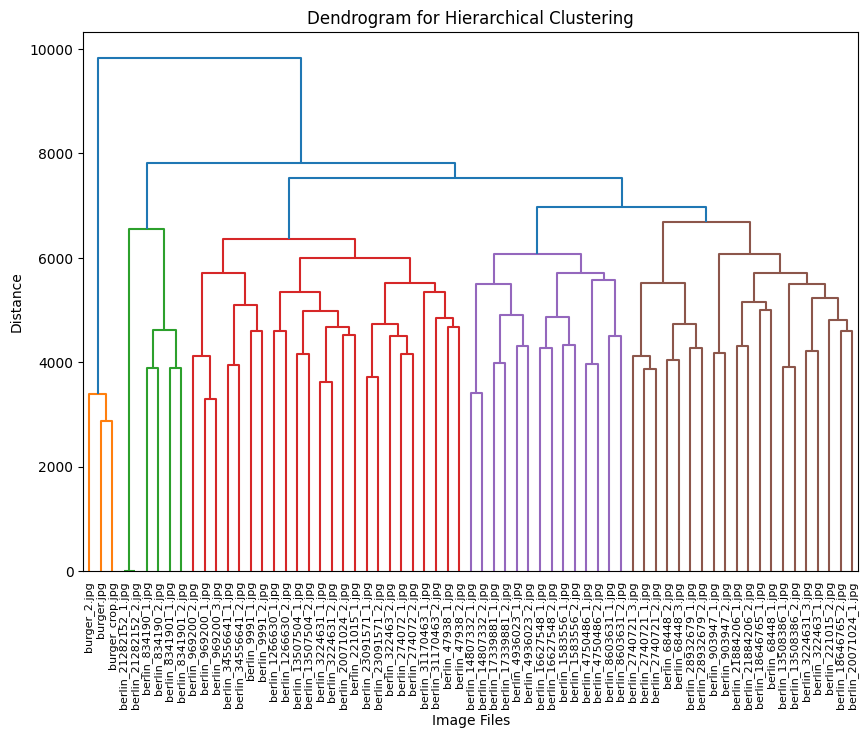

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib import pyplot as plt

# Perform hierarchical clustering using the 'ward' method
linkage_matrix = linkage(embedding_vectors, method="ward")

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(
    linkage_matrix,
    labels=[result["file_name"] for result in embedding_results],
    leaf_rotation=90,
    leaf_font_size=8,
)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Image Files")
plt.ylabel("Distance")
plt.show()


In [66]:
# Choose a threshold to cut the dendrogram and form clusters
threshold = 5500  # Adjust this value based on the dendrogram

# Form flat clusters based on the threshold
hierarchical_labels = fcluster(linkage_matrix, t=threshold, criterion="distance")

# Total number of clusters
num_hierarchical_clusters = len(set(hierarchical_labels))
print(f"Number of hierarchical clusters: {num_hierarchical_clusters}")

# Group images by clusters
hierarchical_clusters = {i: [] for i in range(1, max(hierarchical_labels) + 1)}
for idx, label in enumerate(hierarchical_labels):
    hierarchical_clusters[label].append(embedding_results[idx]["file_name"])

# Print cluster groups
for cluster_id, image_files in hierarchical_clusters.items():
    print(f"Cluster {cluster_id}: {image_files}")

Number of hierarchical clusters: 17
Cluster 1: ['burger.jpg', 'burger_2.jpg', 'burger_crop.jpg']
Cluster 2: ['berlin_21282152_1.jpg', 'berlin_21282152_2.jpg']
Cluster 3: ['berlin_8341901_1.jpg', 'berlin_8341901_2.jpg', 'berlin_834190_1.jpg', 'berlin_834190_2.jpg']
Cluster 4: ['berlin_969200_1.jpg', 'berlin_969200_2.jpg', 'berlin_969200_3.jpg']
Cluster 5: ['berlin_34556641_1.jpg', 'berlin_34556641_2.jpg', 'berlin_9991_1.jpg', 'berlin_9991_2.jpg']
Cluster 6: ['berlin_1266630_1.jpg', 'berlin_1266630_2.jpg', 'berlin_13507504_1.jpg', 'berlin_13507504_2.jpg', 'berlin_20071024_2.jpg', 'berlin_221015_1.jpg', 'berlin_3224631_1.jpg', 'berlin_3224631_2.jpg']
Cluster 7: ['berlin_23091571_1.jpg', 'berlin_23091571_2.jpg', 'berlin_274072_1.jpg', 'berlin_274072_2.jpg', 'berlin_322463_2.jpg']
Cluster 8: ['berlin_31170463_1.jpg', 'berlin_31170463_2.jpg', 'berlin_47938_1.jpg', 'berlin_47938_2.jpg']
Cluster 9: ['berlin_14807332_1.jpg', 'berlin_14807332_2.jpg', 'berlin_17339881_1.jpg', 'berlin_17339881_2.j

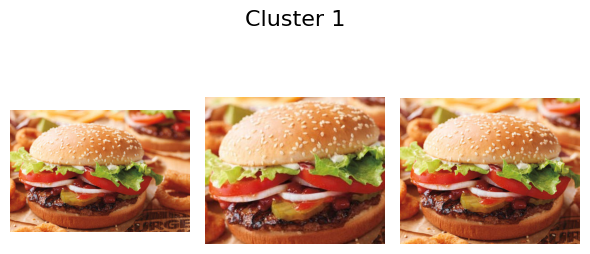

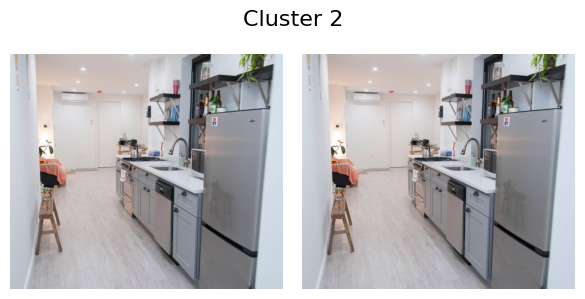

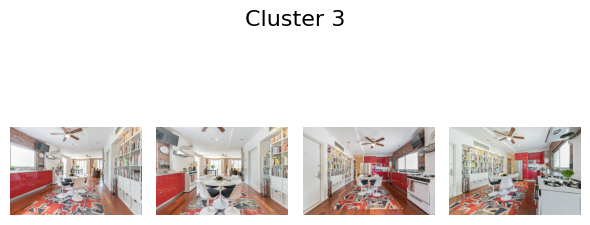

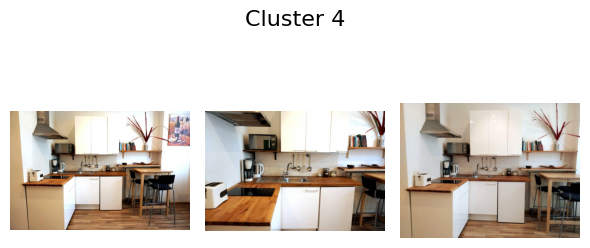

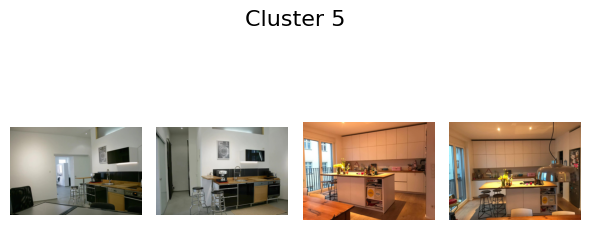

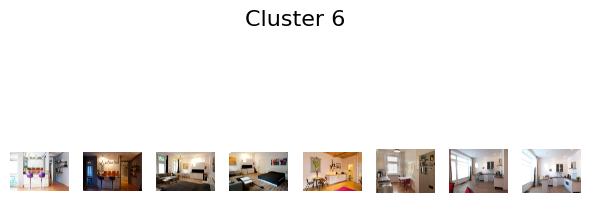

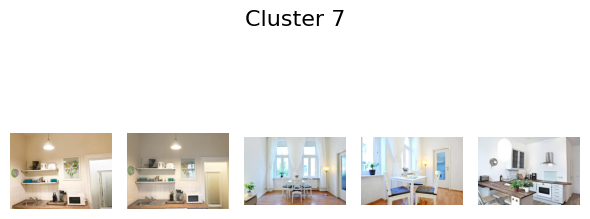

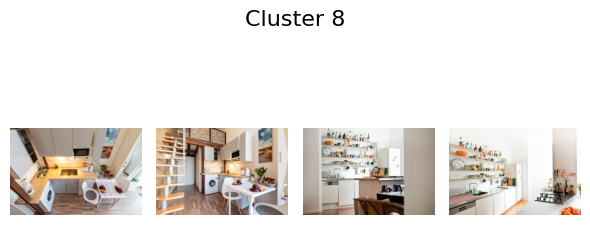

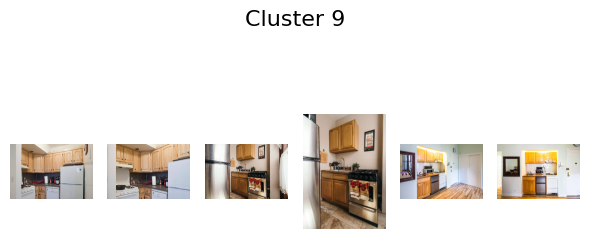

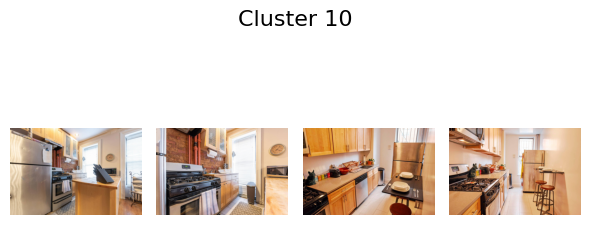

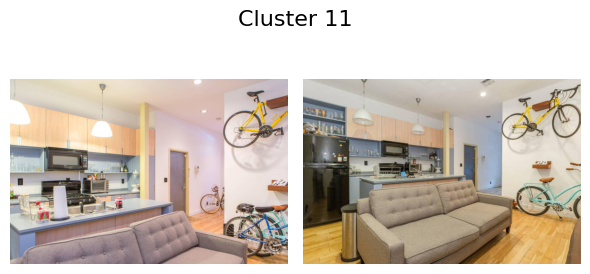

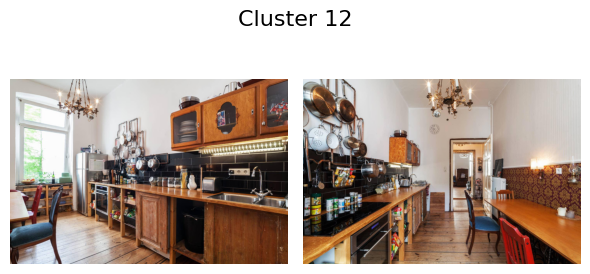

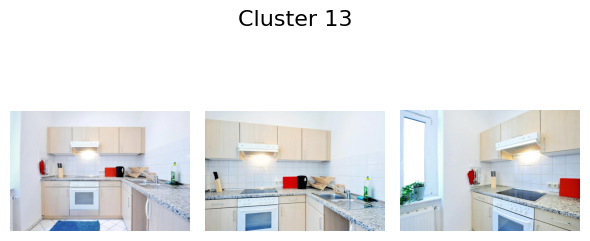

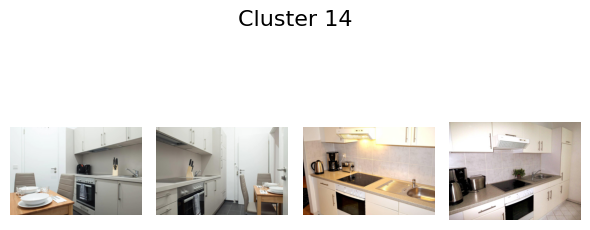

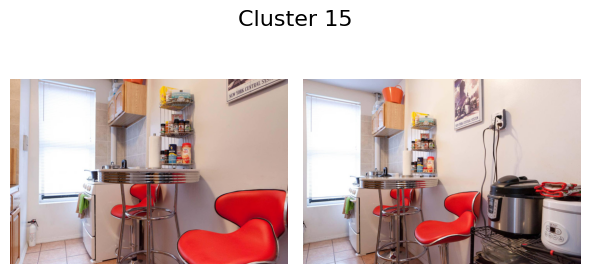

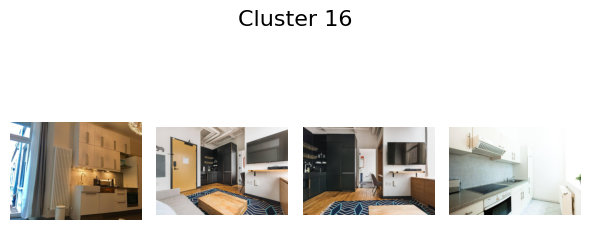

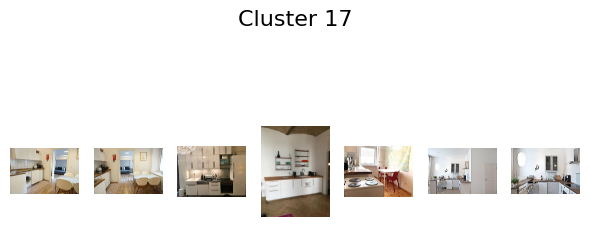

In [67]:
# Display all images per cluster in a grid
for cluster_id, image_files in hierarchical_clusters.items():
    fig, axes = plt.subplots(1, len(image_files), figsize=(6, 3))
    fig.suptitle(f"Cluster {cluster_id}", fontsize=16)

    for ax, image_file in zip(axes, image_files):
        ax.imshow(cv2.cvtColor(images[image_file], cv2.COLOR_BGR2RGB))
        ax.axis("off")

    plt.tight_layout()
    plt.show()